# Gravitational lensing

This notebook is intented to give the reader a more "hands-on" experience with gravitational lenses to illustrate their behaviour. In this notebook, we regulary borrow materials from Massimo Meneghetti's [lecture notes](http://www.ita.uni-heidelberg.de/~massimo/sub/Lectures/gl_all.pdf), and his extensive [PhD thesis](http://www.astro.unipd.it/cosmo/TArchive/phdmeneghetti.pdf) on the subject.

In [1]:
from astropy.constants import c
from astropy.constants import G
from astropy.cosmology import WMAP9 as cosmology

import astropy.units as u
import numpy as np
import torch

import os

## Lensing formalism

## Setup

The speed of light is

In [2]:
c

<<class 'astropy.constants.codata2014.CODATA2014'> name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2014'>

The gravitational constant is

In [3]:
G

<<class 'astropy.constants.codata2014.CODATA2014'> name='Gravitational constant' value=6.67408e-11 uncertainty=3.1e-15 unit='m3 / (kg s2)' reference='CODATA 2014'>

The $\Lambda CDM$ cosmology is parameterized using the constraints in the [WMAP9](https://arxiv.org/pdf/1212.5226.pdf) study, i.e.,

In [4]:
cosmology

FlatLambdaCDM(name="WMAP9", H0=69.3 km / (Mpc s), Om0=0.286, Tcmb0=2.725 K, Neff=3.04, m_nu=[0. 0. 0.] eV, Ob0=0.0463)

## Simulation

For simulation purposes we use `refractor`.

In [5]:
import refractor

### Defining a source

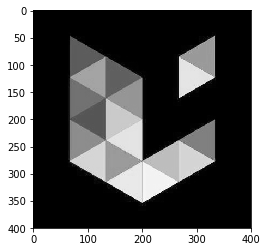

In [16]:
import PIL

image = PIL.Image.open("data/uliege_logo.jpg").convert('L')
image_data = np.asarray(image.getdata()).reshape(image.size)

import matplotlib.pyplot as plt

plt.imshow(image_data, cmap='Greys',  interpolation='nearest')
plt.show()

For this simple example, we set the redshift of the source at $z = 2$.

In [7]:
z_source = 2.0

The image data is converted to a Torch tensor.

In [8]:
data = torch.tensor(image_data, dtype=torch.float64)

Creating a source plane is simply combining this information as:

In [9]:
source = refractor.source(z_source, data)

### Defining a lens

For illustration purposes, we will model the lens as a point-mass. For this, we first have to define the mass of our point-mass less, i.e.,

In [10]:
lens_mass = 50000000000 * u.M_sun

lens_mass

<Quantity 5.e+10 solMass>

Simiraly as the source, we need to define the distance of the lens from the observer:

In [11]:
z_lens = 0.5

As the lens plane is also the camera plane, we have to define the resolution of the the plane,

In [12]:
source.shape

torch.Size([400, 400])

Constructing the point-mass lens is done as

In [13]:
lens = refractor.lens.point_mass(z_lens, source.shape, lens_mass)

### Gravity at work

This simulation is done based on a cosmology (which has its own parameters), a lens and a source plane.

In [14]:
simulator = refractor.simulator(cosmology, lens, source)
lensed = simulator.trace()

Raytracing throught these, yields

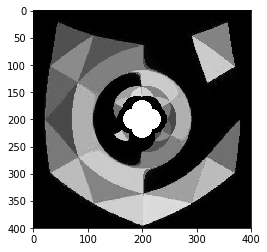

In [15]:
plt.imshow(lensed, cmap='Greys',  interpolation='nearest')
plt.show()